### Importing Dependencies

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

### Reading the data

In [2]:
df = pd.read_csv('housingDataset.csv', header=None, delim_whitespace=True)

df = df.set_axis(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'], axis=1)

df.head()
df.shape
df.to_csv("housingDataset_clean.csv", index=False)

df = pd.read_csv('housingDataset_clean.csv')
df.head()

C:\Users\DEBOJIT\AppData\Local\Temp\ipykernel_42884\1498374550.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('housingDataset.csv', header=None, delim_whitespace=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Checking for null values

In [3]:
df.isnull().sum()


# Drop rows with any null values
# df = df.dropna()

# Drop columns with any null values
# df = df.dropna(axis=1)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Knowing the correlation between various features

Positive/Negative/Zero

In [5]:
corr = df.corr()

### Constructing a heatmap to understand the correlation

<Axes: >

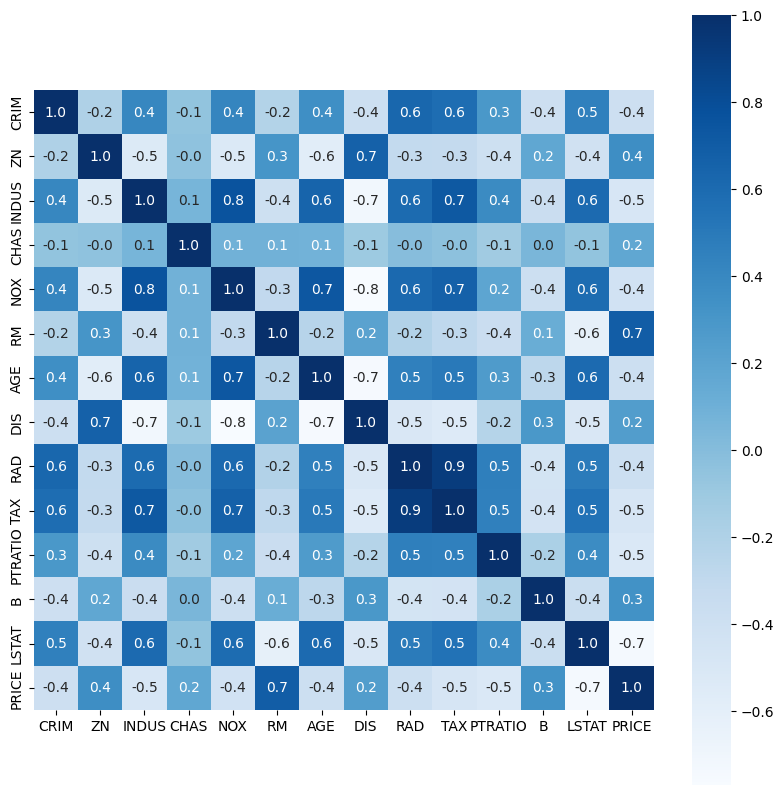

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(annot=True, cbar=True, data=corr,
            square=True, fmt='.1f', cmap='Blues')

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

### Splitting the data into training and test data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

#### Training the model

In [9]:
model = XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Evaluating the model

For training data

In [10]:
X_train_pred = model.predict(X_train)
# print(X_train_pred)
# X_train_pred.shape

In [11]:
# R squared error
r1 = metrics.r2_score(y_train, X_train_pred)
print("R squared error on training data : ", r1)

# Mean absolute error
mean = metrics.mean_absolute_error(y_train, X_train_pred)
print("Mean Absolute error on training data : ", mean)

R squared error on training data :  0.9999980039471451
Mean Absolute error on training data :  0.0091330346494618


#### Visualizing actual prices and predicted prices for training data

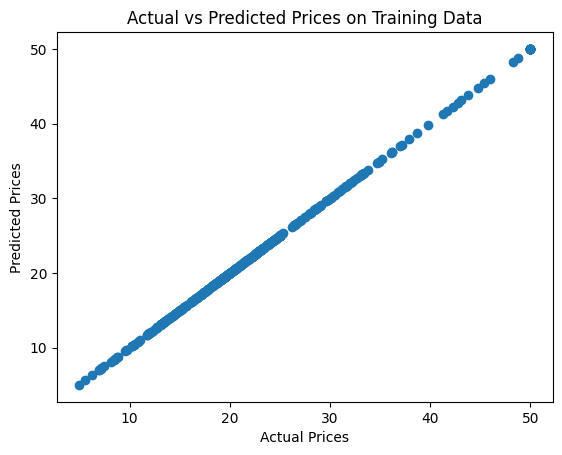

In [12]:
plt.scatter(y_train, X_train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices on Training Data")
plt.show()

For test data           

In [13]:
X_test_pred = model.predict(X_test)

# R squared error
r2 = metrics.r2_score(y_test, X_test_pred)
# Mean absolute error
mean = metrics.mean_absolute_error(y_test, X_test_pred)

print("R squared error on test data : ", r2)
print("Mean Absolute error on test data : ", mean)

R squared error on test data :  0.9051721149855378
Mean Absolute error on test data :  2.0748727686264927


#### Visualizing actual prices and predicted prices for test data

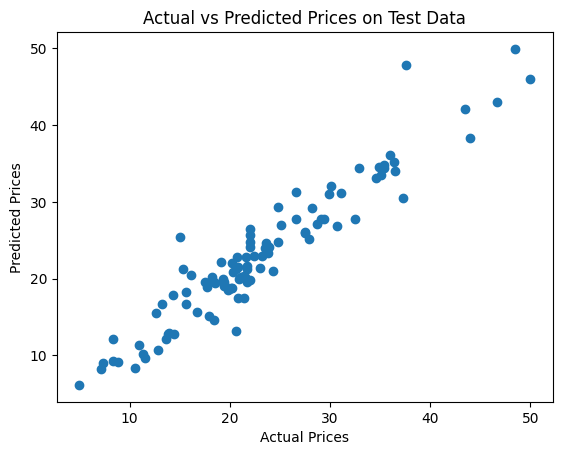

In [14]:
plt.scatter(y_test, X_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices on Test Data")
plt.show()

#### Selecting important features

In [ ]:
importance = model.get_booster().get_score(importance_type='gain')
important_features = pd.DataFrame({
    "Feature": list(importance.keys()),
    "Importance": list(importance.values())
}).sort_values(by="Importance", ascending=False)

# print(important_features[:5])
important_features = important_features[:5]

# ['LSTAT', 'RM', 'DIS', 'TAX', 'PTRATIO']
top_features = important_features["Feature"].tolist()
topValues = df[top_features]

print(topValues)

     LSTAT     RM     DIS    TAX  PTRATIO
0     4.98  6.575  4.0900  296.0     15.3
1     9.14  6.421  4.9671  242.0     17.8
2     4.03  7.185  4.9671  242.0     17.8
3     2.94  6.998  6.0622  222.0     18.7
4     5.33  7.147  6.0622  222.0     18.7
..     ...    ...     ...    ...      ...
501   9.67  6.593  2.4786  273.0     21.0
502   9.08  6.120  2.2875  273.0     21.0
503   5.64  6.976  2.1675  273.0     21.0
504   6.48  6.794  2.3889  273.0     21.0
505   7.88  6.030  2.5050  273.0     21.0

[506 rows x 5 columns]


In [50]:
other_features = df.drop(columns=top_features)
other_features = other_features.drop(columns=['PRICE'])

print(other_features)

        CRIM    ZN  INDUS  CHAS    NOX   AGE  RAD       B
0    0.00632  18.0   2.31     0  0.538  65.2    1  396.90
1    0.02731   0.0   7.07     0  0.469  78.9    2  396.90
2    0.02729   0.0   7.07     0  0.469  61.1    2  392.83
3    0.03237   0.0   2.18     0  0.458  45.8    3  394.63
4    0.06905   0.0   2.18     0  0.458  54.2    3  396.90
..       ...   ...    ...   ...    ...   ...  ...     ...
501  0.06263   0.0  11.93     0  0.573  69.1    1  391.99
502  0.04527   0.0  11.93     0  0.573  76.7    1  396.90
503  0.06076   0.0  11.93     0  0.573  91.0    1  396.90
504  0.10959   0.0  11.93     0  0.573  89.3    1  393.45
505  0.04741   0.0  11.93     0  0.573  80.8    1  396.90

[506 rows x 8 columns]


#### Making the predictive system

In [75]:
input_data = (5.2, 6.5, 3.2, 300, 15.0)
user_input = pd.DataFrame([input_data], columns=top_features)
# user_input

# Fill other features with median values
for feature in other_features:
    user_input[feature] = df[feature].median()
# user_input

original_order = df.drop(columns='PRICE').columns
# print(original_order)
final_input = user_input[original_order]
# final_input


predicted_price = model.predict(final_input)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 23.98126


### Saving the model

In [76]:
import pickle
filename = 'house_price_model.sav'
pickle.dump(model, open(filename, 'wb'))

MSE: 0.349
RMSE: 0.591
R² Score: 0.995


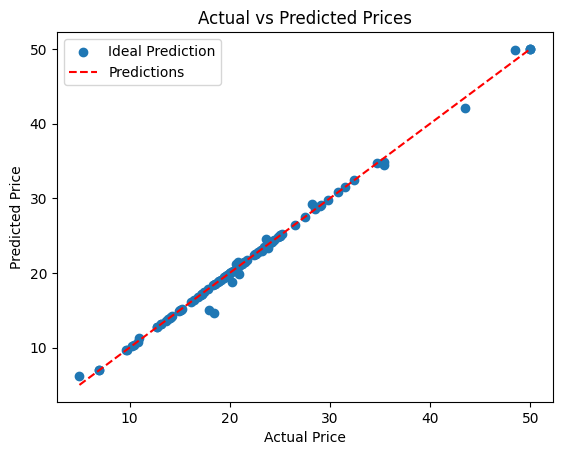

In [ ]:

# Load saved model
with open("house_price_model.sav", "rb") as f:
    model = pickle.load(f)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.legend(['Ideal Prediction', 'Predictions'])
plt.show()


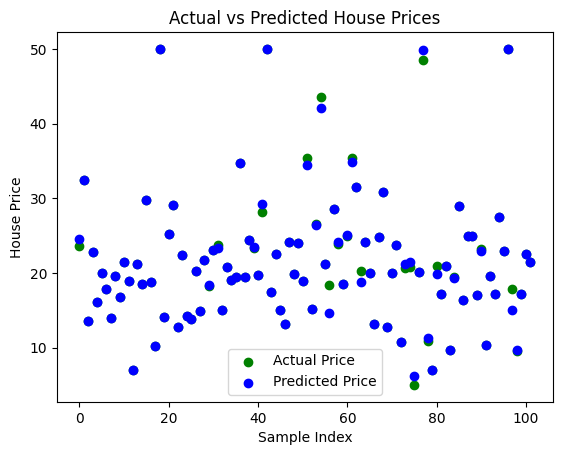

In [ ]:
# Scatter plot of predicted vs actual
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual Price')
plt.scatter(range(len(y_test)), y_pred, color='blue', label='Predicted Price')

plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()